# Calculating Chern number

In [1]:
import numpy as np
from numpy import linalg as la

O = 0.
M = 1. # g
C = 1. # N/m
w0 = np.sqrt(C / M)
l = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * l * x
a2 = (np.sqrt(3) * x + 3 * y) * l / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R11 = R1 * R1.conj().T
R22 = R2 * R2.conj().T
R33 = R3 * R3.conj().T

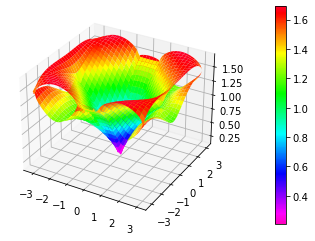

In [34]:
import numpy as np
precision = 0.1
kxs = np.arange(-np.pi, np.pi, precision) 
kys = np.arange(-np.pi, np.pi, precision)



R0_ = lambda k: (1 / 2 * (3 - np.exp(1.j * k.dot(R1)) - np.exp(1.j * k.dot(R2)) - np.exp(1.j * k.dot(R3)))).item()
R1_ = lambda k: (np.sqrt(3) / 4 * (np.exp(1.j * k.dot(R2)) - np.exp(1.j * k.dot(R1)))).item()
R2_ = lambda k: (2 * O / w0**2).item()
R3_ = lambda k: (1 / 4 * (1 - np.exp(1.j * k.dot(R1)) - np.exp(1.j * k.dot(R2)) + np.exp(1.j * k.dot(R3)))).item()
R = lambda k: np.sqrt(R1_(k)**2 + R2_(k)**2 + R3_(k)**2)


ws = np.zeros((len(kys), len(kxs), 2))

for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        ws[y, x] = np.sqrt(np.array([R0_(k) - R(k), R0_(k) + R(k)])).real
        # ws[y, x] = np.array([R0_(k) - R(k), R0_(k) + R(k)]).real



# 3D dispersion
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(ws[:, :, 1])
ax.plot_surface(X, Y, ws[:, :, 0], cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, ws[:, :, 1], cmap='gist_rainbow_r') 

# ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
# ax.set_xlim(-xw, xw)
# ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
# ax.set_ylim(-yw, yw)
# ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
# ax.set_zlim(0)

fig.colorbar(p, pad=0.15)
# fig.savefig("2d-graphene-dispersion-3d.png")
plt.show()

C:\Users\cfr2a\AppData\Local\Temp/ipykernel_16020/4031708621.py:23: RuntimeWarning: invalid value encountered in sqrt
  ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 0]), vmin=0., vmax=vmax, cmap='gist_rainbow_r')
C:\Users\cfr2a\AppData\Local\Temp/ipykernel_16020/4031708621.py:23: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 0]), vmin=0., vmax=vmax, cmap='gist_rainbow_r')


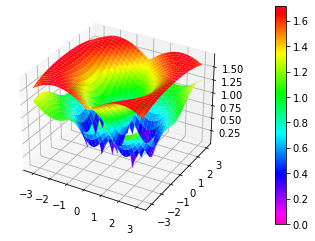

In [29]:
evals_all = np.zeros((len(kys), len(kxs), 2))
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        H = np.array([
            [R0_(k) + R3_(k), R1_(k) - 1.j * R2_(k)],
            [R1_(k) + 1.j * R2_(k), R0_(k) - R3_(k)],
        ])
        evals, _ = la.eigh(H)
        evals = evals[np.argsort(evals)]
        evals_all[y, x] = evals
evals_all = np.array(evals_all)



# 3D dispersion
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(kxs, kys)

vmax = np.amax(np.sqrt(evals_all[:, :, 1]))
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 0]), vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]), vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

# ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
# ax.set_xlim(-xw, xw)
# ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
# ax.set_ylim(-yw, yw)
# ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
# ax.set_zlim(0)

fig.colorbar(p, pad=0.15)
# fig.savefig("2d-graphene-dispersion-3d.png")
plt.show()


# Using library

In [36]:
import z2pack
import numpy as np

O = 13
M = .01 # kg
C = 4. # N/m
w0 = np.sqrt(C / M)
l = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * l * x
a2 = (np.sqrt(3) * x + 3 * y) * l / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])

R0_ = lambda k: (1 / 2 * (3 - np.exp(1.j * k.dot(R1)) - np.exp(1.j * k.dot(R2)) - np.exp(1.j * k.dot(R3)))).item()
R1_ = lambda k: (np.sqrt(3) / 4 * (np.exp(1.j * k.dot(R2)) - np.exp(1.j * k.dot(R1)))).item()
R2_ = lambda k: (2 * O / w0**2).item()
R3_ = lambda k: (1 / 4 * (1 - np.exp(1.j * k.dot(R1)) - np.exp(1.j * k.dot(R2)) + np.exp(1.j * k.dot(R3)))).item()
R = lambda k: np.sqrt(R1_(k)**2 + R2_(k)**2 + R3_(k)**2)


mu = -5.

R0_ = lambda k: 0
R1_ = lambda k: (-2 * np.sin(k[0])).item()
R2_ = lambda k: (-2 * np.sin(k[1])).item()
R3_ = lambda k: (2 * (np.cos(k[0]) + np.cos(k[1])) + mu).item()


Os = np.arange(0, 100, 0.1)


def hamiltonian(k):
    kx, ky, kz = k
    k_ = np.array([kx, ky])
    p = np.exp(1.j * k_.dot(a1))
    s = np.exp(1.j * k_.dot(a2))
    # p = k_.dot(a1)
    # s = k_.dot(a2)

    H = np.array([
        [R0_(k_) + R3_(k_), R1_(k_) - 1.j * R2_(k_)],
        [R1_(k_) + 1.j * R2_(k_), R0_(k_) - R3_(k_)],
    ])

    # H = w0**2 * np.vstack([
    #     np.hstack([R11 + R22 + R33 - 2.j * O * Rw / w0**2, -(R11 + R22 * p.conj() + R33 * s.conj())]),
    #     np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33 - 2.j * O * Rw / w0**2]),
    # ])


    return H
system = z2pack.hm.System(hamiltonian)


result = z2pack.surface.run(
    system=system,
    surface=lambda t1, t2: [t1, t2, 0]
)

print(z2pack.invariant.chern(result))   # Prints the Chern number
# print(z2pack.invariant.z2(result))   # Prints the Chern numbe


+----------------------------------------------------------------------+
| ===================                                                  |
| SURFACE CALCULATION                                                  |
| ===================                                                  |
| starting at 2022-01-26 08:47:02,460                                  |
| running Z2Pack version 2.2.0                                         |
|                                                                      |
| gap_tol:            0.3                                              |
| init_result:        None                                             |
| iterator:           range(8, 27, 2)                                  |
| load:               False                                            |
| load_quiet:         True                                             |
| min_neighbour_dist: 0.01                                             |
| move_tol:           0.3                         

In [3]:
import numpy as np
import numpy.linalg as la
from sympy import symbols, Matrix, BlockMatrix, conjugate
from sympy.functions import exp


kx, ky = symbols('kx ky')


O = 0.
M = .01 # kg
C = 4. # N/m
w0 = np.sqrt(C / M)
l = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * l * x
a2 = (np.sqrt(3) * x + 3 * y) * l / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])

p = exp(1.j * np.sqrt(3) * kx)
s = exp(1.j * (np.sqrt(3) * kx + 3 * ky) / 2)

H = BlockMatrix([
    [Matrix(R11 + R22 + R33 - 2.j * O * Rw / w0**2), Matrix(-(R11 + R22 * conjugate(p) + R33 * conjugate(s)))],
    [Matrix(-(R11 + R22 * p + R33 * s)) ,Matrix(R11 + R22 + R33 - 2.j * O * Rw / w0**2)]
])
H = w0 ** 2 * Matrix(H)
# H.eigenvects()
print(R11, R22, R33)


[[0.75      0.4330127]
 [0.4330127 0.25     ]] [[ 0.75      -0.4330127]
 [-0.4330127  0.25     ]] [[ 0. -0.]
 [-0.  1.]]


# Chern with extended eigen vecs

In [47]:
import numpy as np
import numpy.linalg as la


O = 0.
C = 1.
M = 1.
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])
precision = 0.01
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 8), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 8, 8), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        L11 = np.vstack([
            np.hstack([R11 + R22 + R33, -(R11 + p.conj() * R22 + s.conj() * R33)]),
            np.hstack([-(R11 + p * R22 + s * R33), R11 + R22 + R33])
        ])
        L12 = np.vstack([
            np.hstack([-Rw * 2.j * O, np.zeros((2, 2))]),
            np.hstack([np.zeros((2, 2)), -Rw * 2.j * O])
        ])
        L = w0 ** 2 * np.vstack([
            np.hstack([L11, L12]),
            np.hstack([np.zeros((4, 4)), np.eye(4)])
        ])
        M = np.vstack([
            np.hstack([np.zeros((4, 4)), np.eye(4)]),
            np.hstack([np.eye(4), np.zeros((4, 4))])
        ])

        H = np.linalg.inv(M).dot(L)
        evals, evecs = la.eig(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)



(838, 726, 8) (838, 726, 8, 8)


In [52]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1_ = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3)) 
a2_ = 4 * np.pi / 3 / a * y
K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
b1 = 2 * np.pi / np.sqrt(3) / a * (x - y / np.sqrt(3))
b2 = 4 * np.pi / 3 / a * y

h = precision
bz= Polygon([K, -K + b1 + b2, K - b1, -K, K - b1 - b2, -K + b1])

print(h)
print(bz.contains(Point(-4,0)))

C = 0
band_number = 6

# xi = evecs_all[:, :, band_number, :2]
# eta = evecs_all[:, :, band_number, 2:4]
xi = evecs_all[:, :, :2, band_number]
eta = evecs_all[:, :, 2:4, band_number]
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        p = Point(kx, ky)
        if not bz.contains(p):
            continue
        dxi_dkx = (xi[y, x+1] - xi[y, x-1]) / (2 * h)
        dxi_dky = (xi[y+1, x] - xi[y-1, x]) / (2 * h)
        C += 1.j * dxi_dkx.conj().T.dot(dxi_dky) - dxi_dky.conj().T.dot(dxi_dkx)

        deta_dkx = (eta[y, x+1] - eta[y, x-1]) / (2 * h)
        deta_dky = (eta[y+1, x] - eta[y-1, x]) / (2 * h)
        C += 1.j * deta_dkx.conj().T.dot(deta_dky) - deta_dky.conj().T.dot(deta_dkx)

C /= 2 * np.pi
# print(evecs_all[0, 0, 0, :4])
# print(evecs_all[0, 0, 0, 4:])

print(C)



0.01
False
(101933.18741767509-101933.18741767509j)


In [56]:

def calc_chern(hVec):
    """Calculate 1st Chern number given eigen-vectors. Using Japanese algorithm
    (2005).
    :param hVec: eigen-vectors of all band (assuming gapless).
    :return: list of Chern number of all bands. Should summed to 0.
    """
    hVec = np.array(hVec)
    dimy, dimx, nlevels, _ = hVec.shape
    cnlist = np.zeros(nlevels)

    for iy in range(dimy-1):
        for ix in range(dimx-1):
            u12 = hVec[iy, ix + 1].conjugate().T @ hVec[iy, ix]
            u23 = hVec[iy + 1, ix + 1].conjugate().T @ hVec[iy, ix + 1]
            u34 = hVec[iy + 1, ix].conjugate().T @ hVec[iy + 1, ix + 1]
            u41 = hVec[iy, ix].conjugate().T @ hVec[iy + 1, ix]
            t12 = np.diag(u12.diagonal())
            t23 = np.diag(u23.diagonal())
            t34 = np.diag(u34.diagonal())
            t41 = np.diag(u41.diagonal())
            tplaquet = t41 @ t34 @ t23 @ t12
            cnlist += np.angle(tplaquet.diagonal())

    cnlist /= 2 * np.pi
    cnlist = chop(cnlist)
    return cnlist


def chop(array, tol=1e-7):
    """Realize Mathematica Chop[].
    :param array: 1D array.
    :param tol: tolerance to be chopped. default to 1e-7
    :return: chopped array. (original array alse modified.)
    """
    for i in range(len(array)):
        a = array[i]
        if np.abs(a-round(a)) < tol:
            array[i] = round(a)
    return array

calc_chern(evecs_all[:, :, :4, 4:])

array([-37.36966799,   1.81470808,  -6.64135569,  -1.35299878])

# Chern with perturbation

In [74]:
import numpy as np
import numpy.linalg as la



O = 4
C = 4
M = 0.01
w0 = np.sqrt(C / M)
a = 1. # distance between masses
x = np.array([[1.], [0.]]) # x hat
y = np.array([[0.], [1.]]) # y hat
a1 = np.sqrt(3) * a * x
a2 = (np.sqrt(3) * x + 3 * y) * a / 2.
R1 = 1 / 3 * (a1 + a2)
R2 = 1 / 3 * (-2 * a1 + a2)
R3 = 1 / 3 * (a1 - 2 * a2)
R1h = R1 / la.norm(R1)
R2h = R2 / la.norm(R2)
R3h = R3 / la.norm(R3)
R11 = R1h * R1h.conj().T
R22 = R2h * R2h.conj().T
R33 = R3h * R3h.conj().T
Rw = np.array([[0., -1.], [1., 0.]])
precision = 1e-2
xw = np.pi / np.sqrt(3) * 2 # width of x
yw = np.pi / 3 * 4 # width of y
kxs = np.arange(-xw, xw, precision)
kys = np.arange(-yw, yw, precision)


evals_all = np.zeros((len(kys), len(kxs), 4), dtype=np.complex128)
evecs_all = np.zeros((len(kys), len(kxs), 4, 4), dtype=np.complex128)
for y, ky in enumerate(kys):
    for x, kx in enumerate(kxs):
        k = np.array([kx, ky])
        p = np.exp(1.j * k.dot(a1))
        s = np.exp(1.j * k.dot(a2))
        H = w0**2 * np.vstack([
            np.hstack([R11 + R22 + R33 - 2.j * O * Rw / w0**2, -(R11 + R22 * p.conj() + R33 * s.conj())]),
            np.hstack([-(R11 + R22 * p + R33 * s) ,R11 + R22 + R33 - 2.j * O * Rw / w0**2]),
        ])
        evals, evecs = la.eigh(H)
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        evecs_all[y, x] = evecs
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)
print(evals_all.shape, evecs_all.shape)

(838, 726, 4) (838, 726, 4, 4)


In [7]:
from conut import MechanicalGraphene, HamiltonianType, MechanicalGrapheneLattice
from conut.data import WaveNumber, WaveNumberType
from torch.utils.data import DataLoader
import torch
import numpy as np
from shapely.geometry import Polygon, Point


dev = 'cuda' if torch.cuda.is_available() else 'cpu'
dev = 'cpu'
κ = 1.
α = 1.
m = 1.
l = 1.
params = {'batch_size': 512,
          'shuffle': False,
          'num_workers': 4}

for Ω in [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:

    # Setup Lattice
    lattice = MechanicalGrapheneLattice(l, α, device=dev)

    # Construct wavenumber dataset
    wn = WaveNumber(WaveNumberType.XY, lattice, precision=3e-3)
    wn_gkm = WaveNumber(WaveNumberType.GKM, lattice, precision=1e-1)
    wn_generator = DataLoader(wn, **params)
    wn_gkm_generator = DataLoader(wn_gkm, **params)

    # Build mechanical graphene model
    mg = MechanicalGraphene(κ=κ, m=m, α=α, lattice=lattice, h_type=HamiltonianType.Bulk, shape=wn.shape, Ω=Ω, perturbation=True).to(dev)
    # mg_gkm = MechanicalGraphene(κ=κ, m=m, α=α, lattice=lattice, h_type=HamiltonianType.Bulk, shape=wn_gkm.shape, Ω=Ω, GKM=True, perturbation=False).to(dev)


    for idcs_batch, ks_batch in wn_generator:
        idcs_batch, ks_batch = idcs_batch.to(dev), ks_batch.to(dev)
        mg(idcs_batch, ks_batch)
    evecs = mg.evecs.detach().numpy()

    def calc_chern(hVec):
        """Calculate 1st Chern number given eigen-vectors. Using Japanese algorithm
        (2005).
        :param hVec: eigen-vectors of all band (assuming gapless).
        :return: list of Chern number of all bands. Should summed to 0.
        """
        hVec = np.array(hVec)
        dimy, dimx, nlevels, _ = hVec.shape
        cnlist = np.zeros(nlevels)

        for iy in range(dimy-1):
            for ix in range(dimx-1):
                u12 = hVec[iy, ix + 1].conjugate().T @ hVec[iy, ix]
                u23 = hVec[iy + 1, ix + 1].conjugate().T @ hVec[iy, ix + 1]
                u34 = hVec[iy + 1, ix].conjugate().T @ hVec[iy + 1, ix + 1]
                u41 = hVec[iy, ix].conjugate().T @ hVec[iy + 1, ix]
                t12 = np.diag(u12.diagonal())
                t23 = np.diag(u23.diagonal())
                t34 = np.diag(u34.diagonal())
                t41 = np.diag(u41.diagonal())
                tplaquet = t41 @ t34 @ t23 @ t12
                cnlist += np.angle(tplaquet.diagonal())

        cnlist /= 2 * np.pi
        cnlist = chop(cnlist)
        return cnlist


    def chop(array, tol=1e-7):
        """Realize Mathematica Chop[].
        :param array: 1D array.
        :param tol: tolerance to be chopped. default to 1e-7
        :return: chopped array. (original array alse modified.)
        """
        for i in range(len(array)):
            a = array[i]
            if np.abs(a-round(a)) < tol:
                array[i] = round(a)
        return array

    
    x = np.array([[1.], [0.]]) # x hat
    y = np.array([[0.], [1.]]) # y hat
    a1_ = 2 * np.pi / np.sqrt(3) / l * (x - y / np.sqrt(3)) 
    a2_ = 4 * np.pi / 3 / l * y
    K = (a1_ / 2 + a2_ / 4) / np.cos(np.pi / 6)**2
    b1 = 2 * np.pi / np.sqrt(3) / l * (x - y / np.sqrt(3))
    b2 = 4 * np.pi / 3 / l * y

    bz= Polygon([K, -K + b1 + b2, K - b1, -K, K - b1 - b2, -K + b1])

    evecs_all_bz = np.zeros((len(wn.kys), len(wn.kxs), 4, 4), dtype=np.complex128)

    for y, ky in enumerate(wn.kys):
        for x, kx in enumerate(wn.kxs):
            p = Point(kx, ky)
            if not bz.contains(p):
                continue
            evecs_all_bz[y, x] = evecs[y, x]

    print(Ω, calc_chern(evecs_all_bz))

KeyboardInterrupt: 